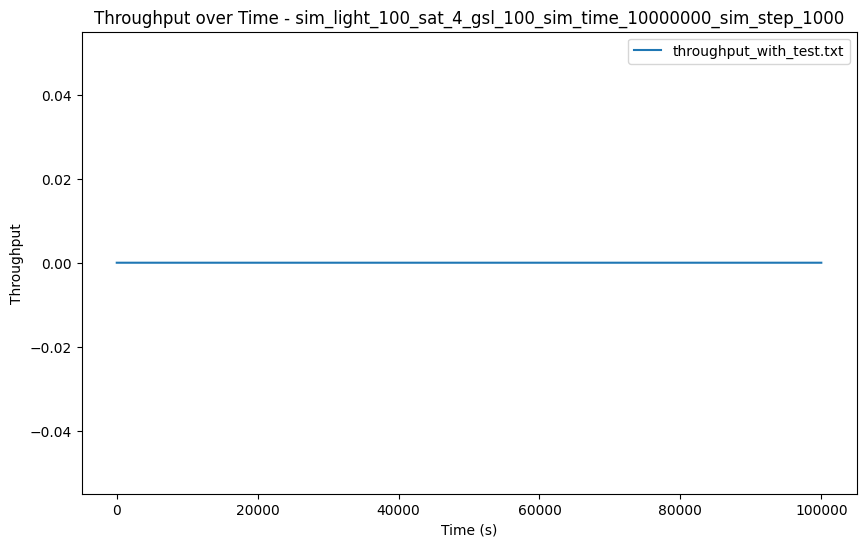

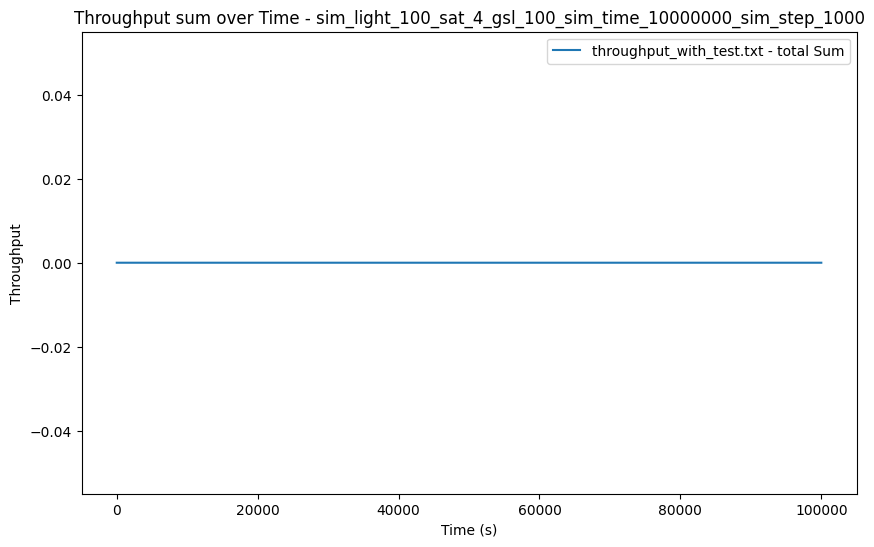

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data found for latency_with_test.txt. Skipping plot.


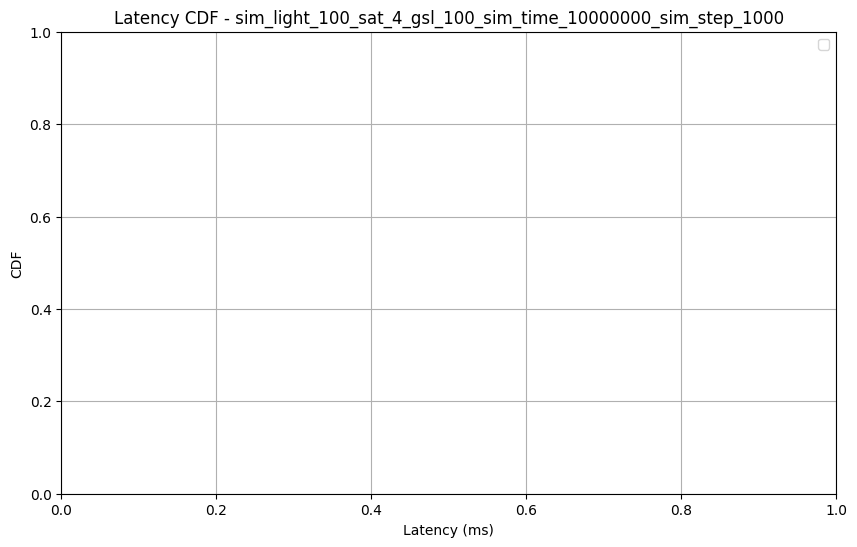

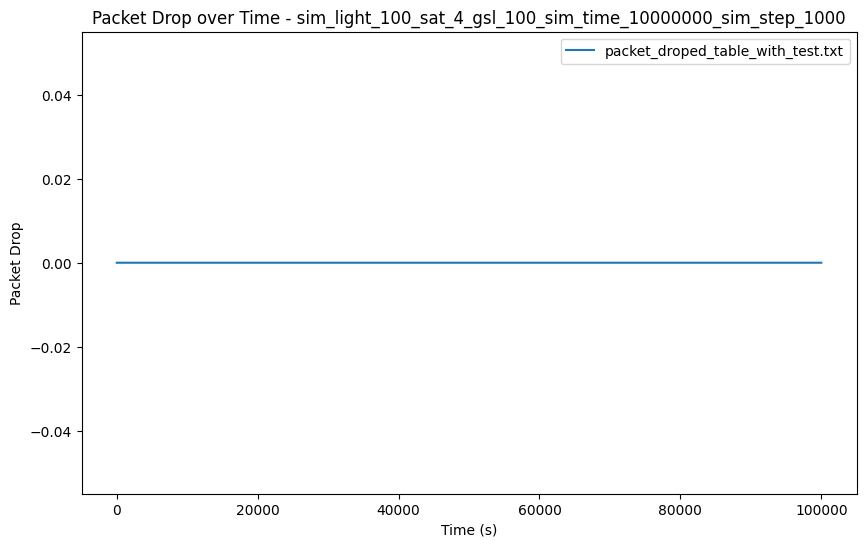

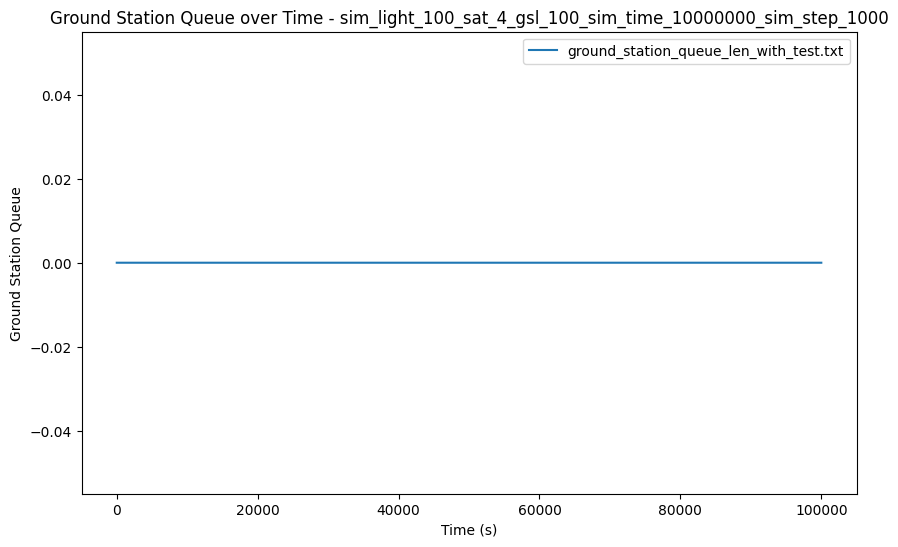

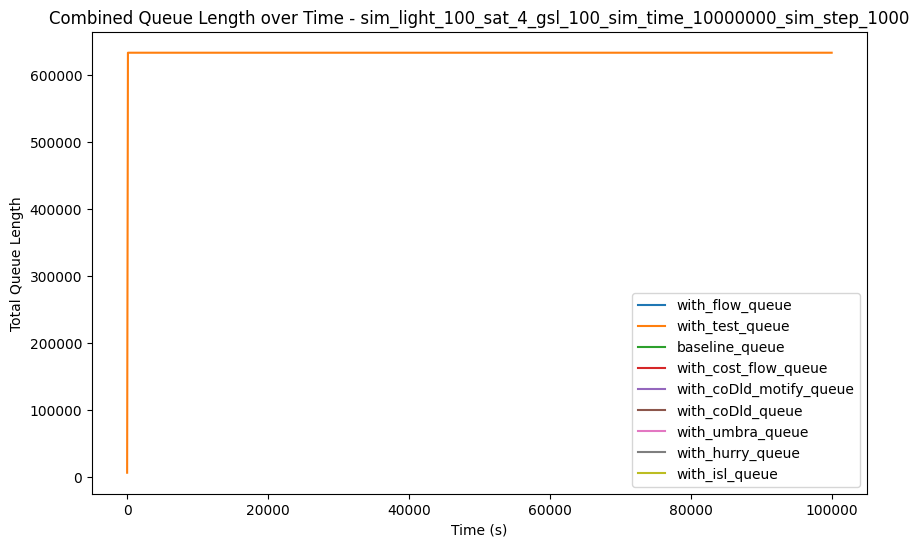

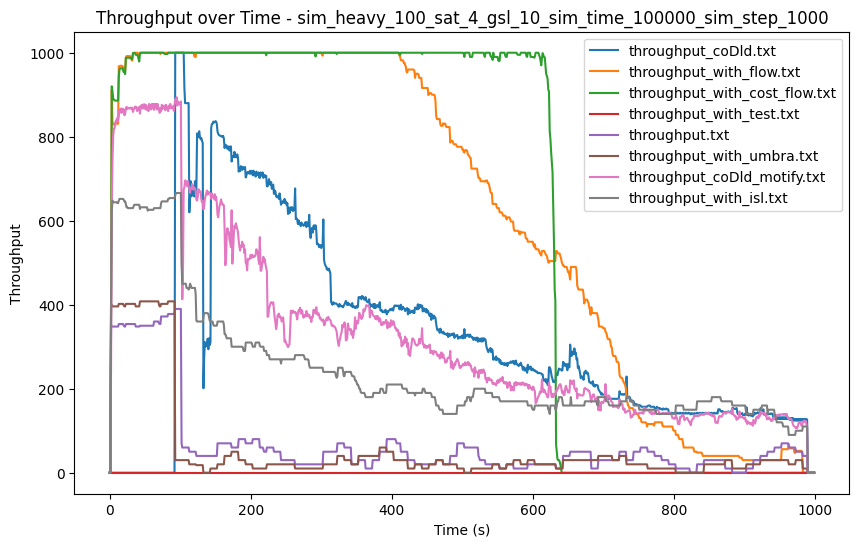

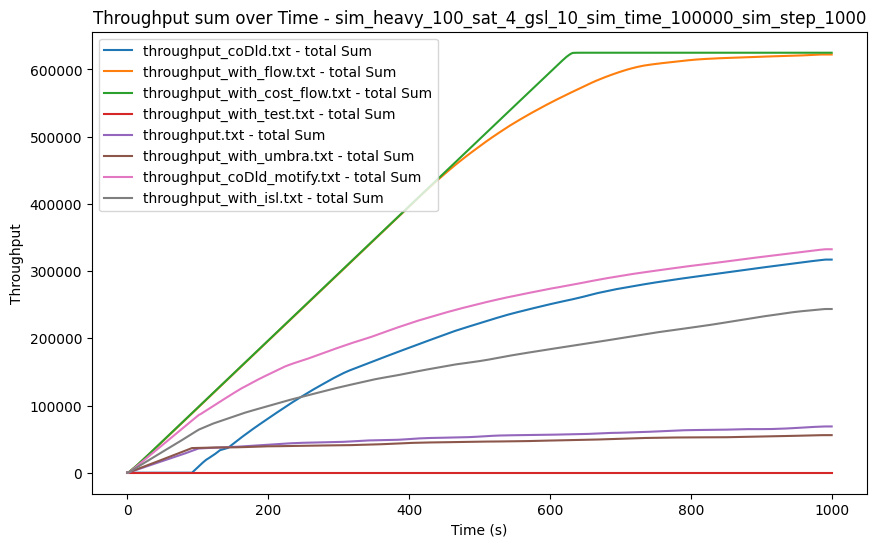

No data found for latency_with_test.txt. Skipping plot.


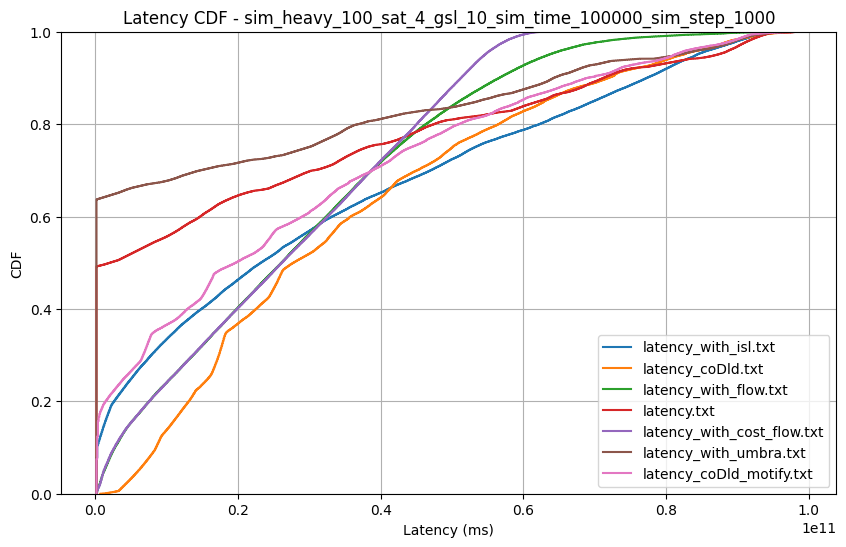

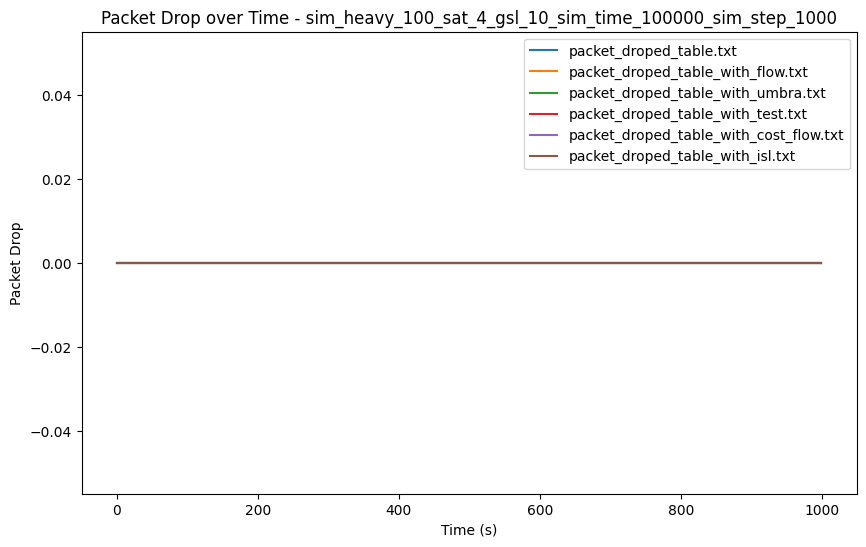

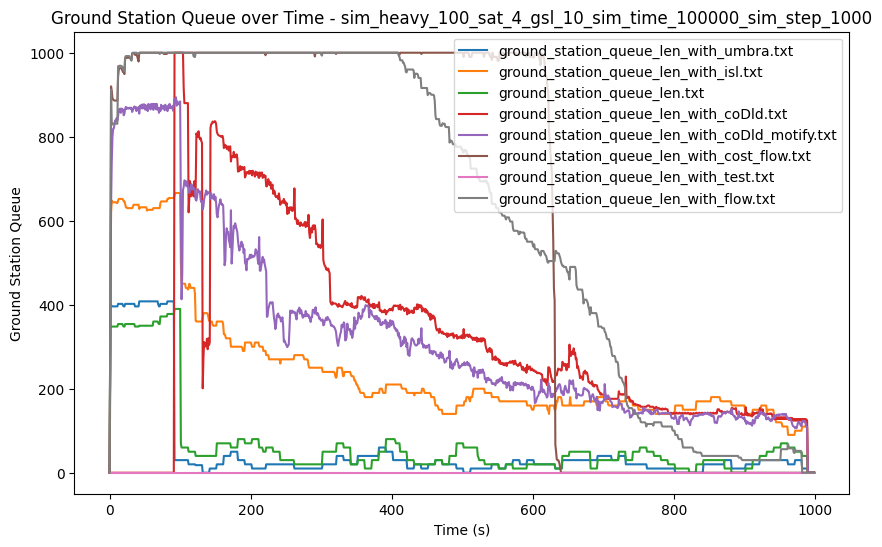

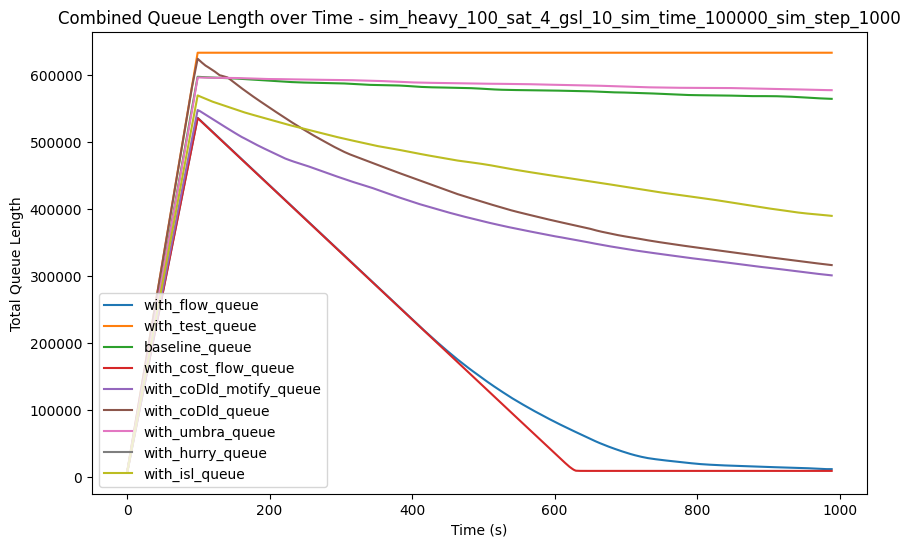

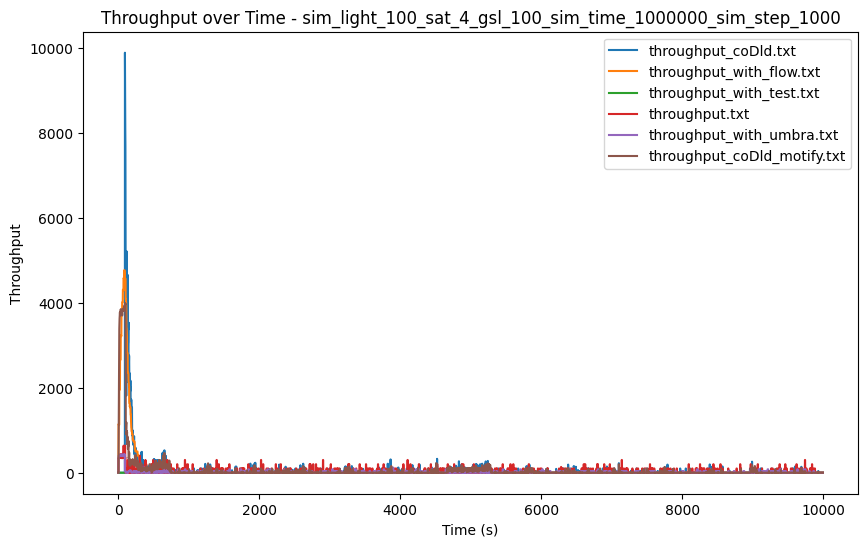

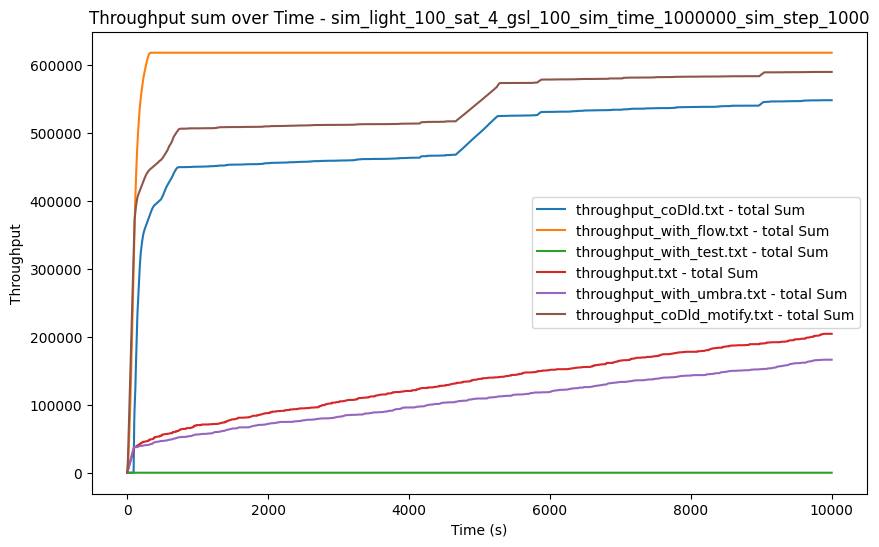

No data found for latency_with_test.txt. Skipping plot.


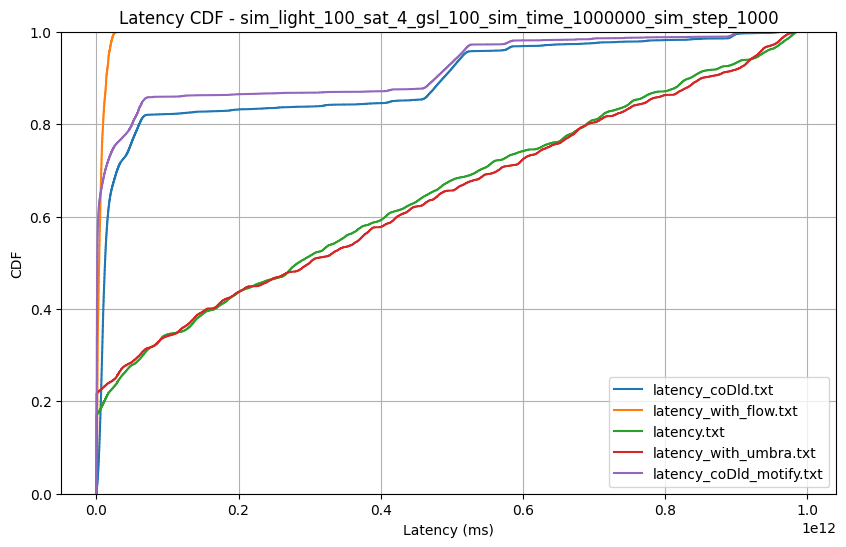

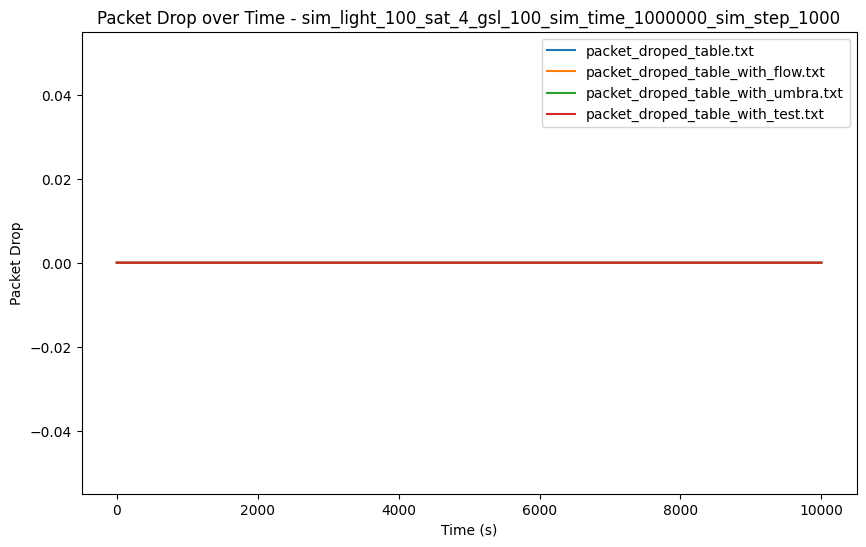

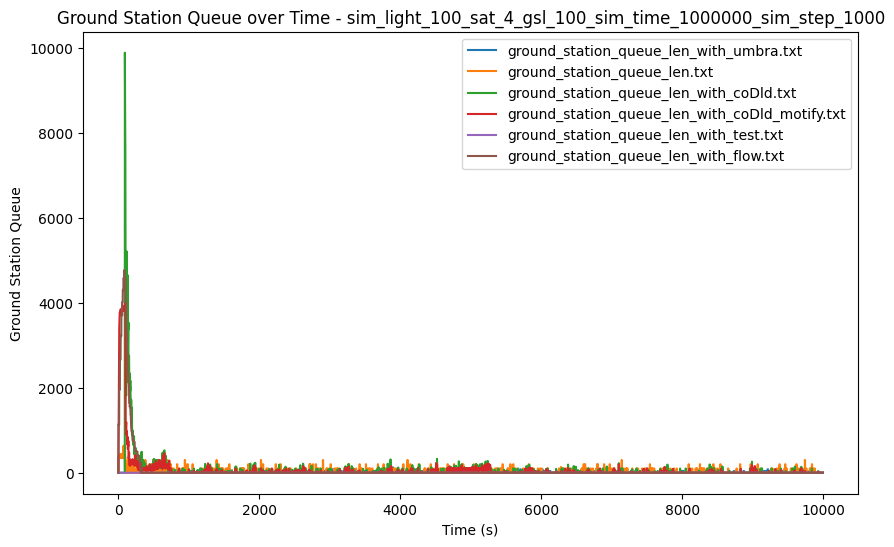

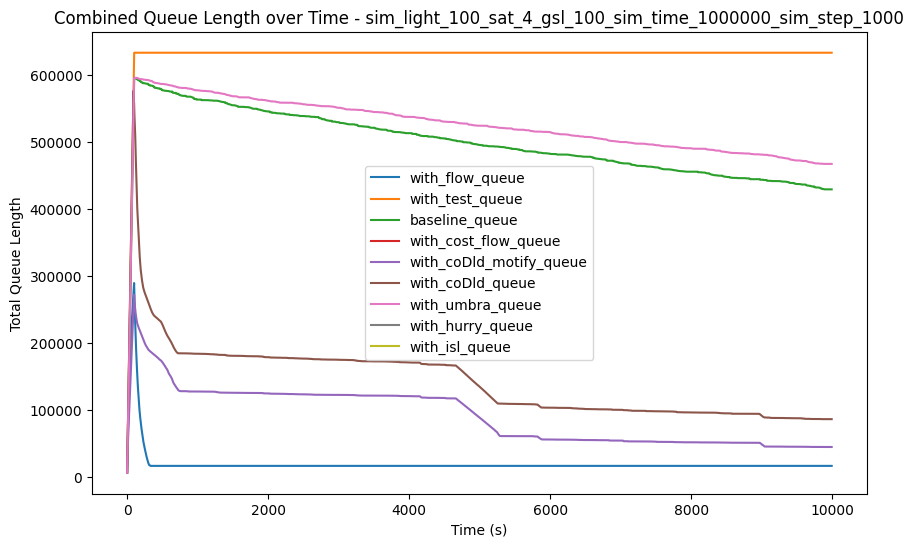

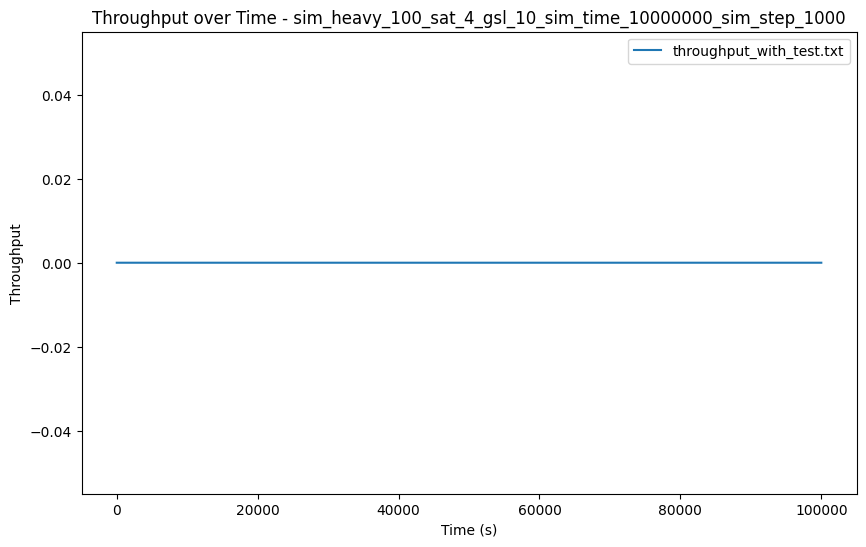

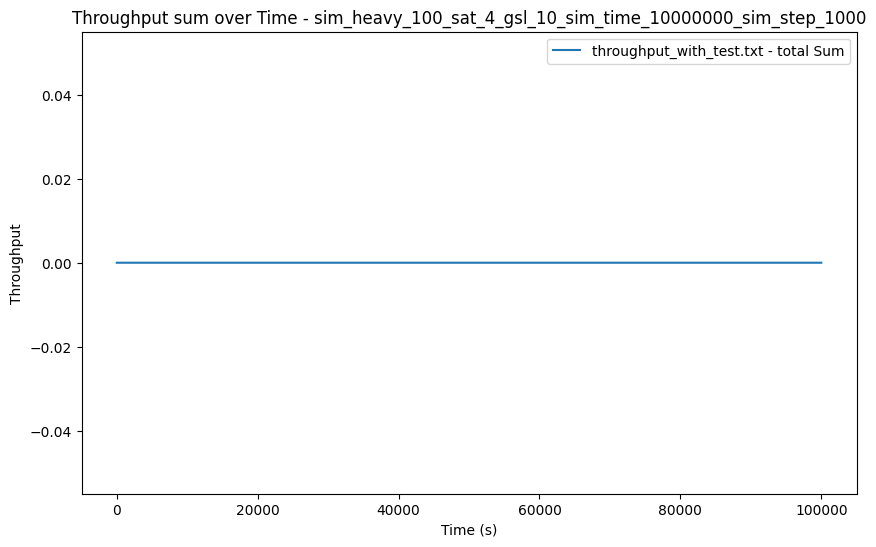

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data found for latency_with_test.txt. Skipping plot.


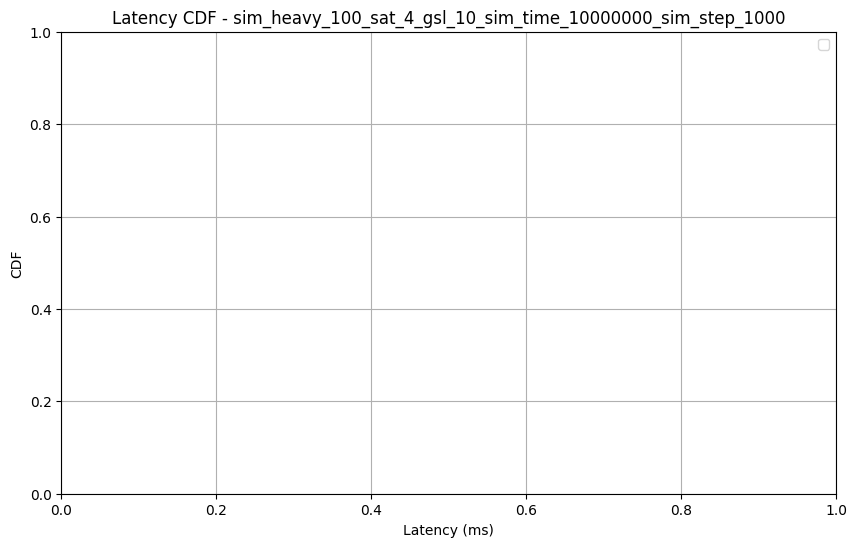

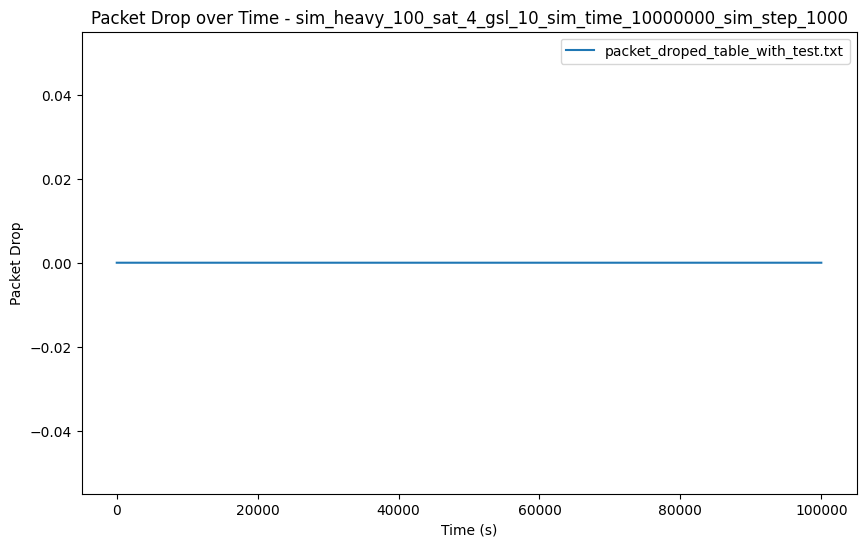

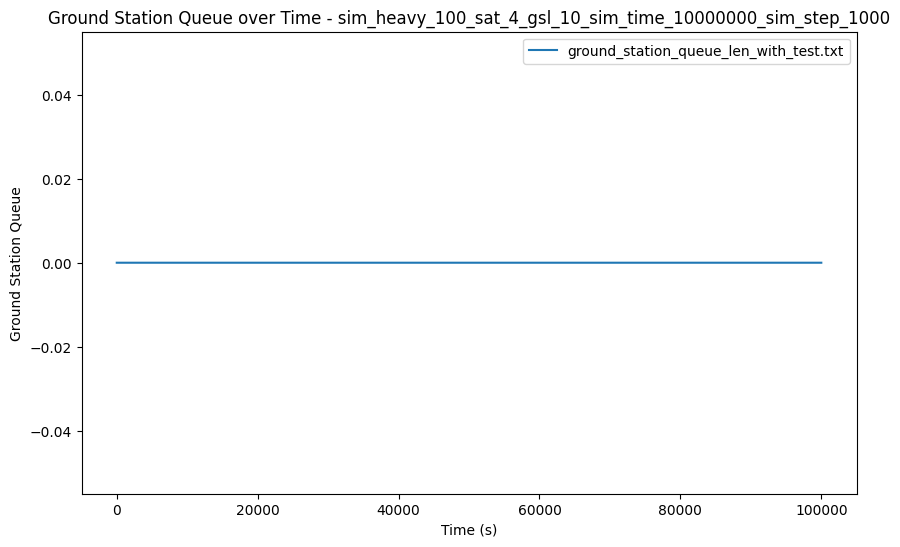

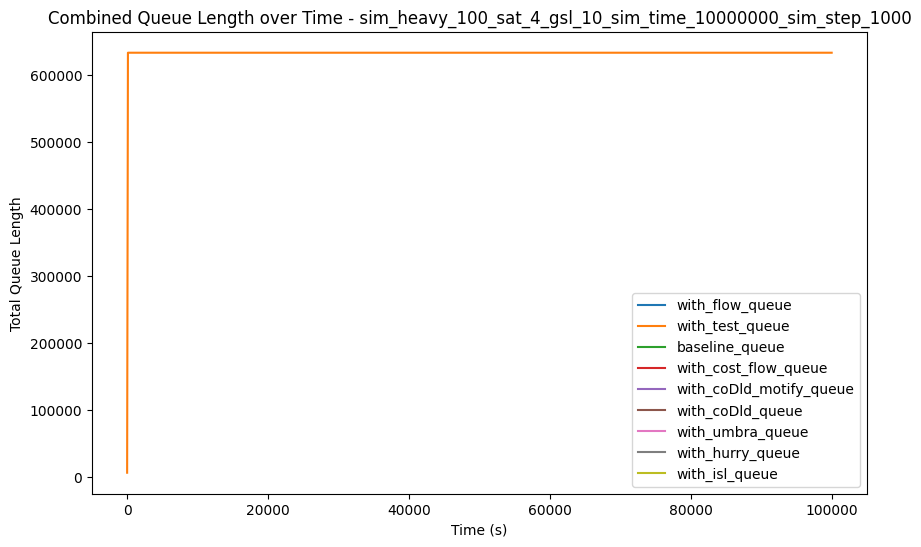

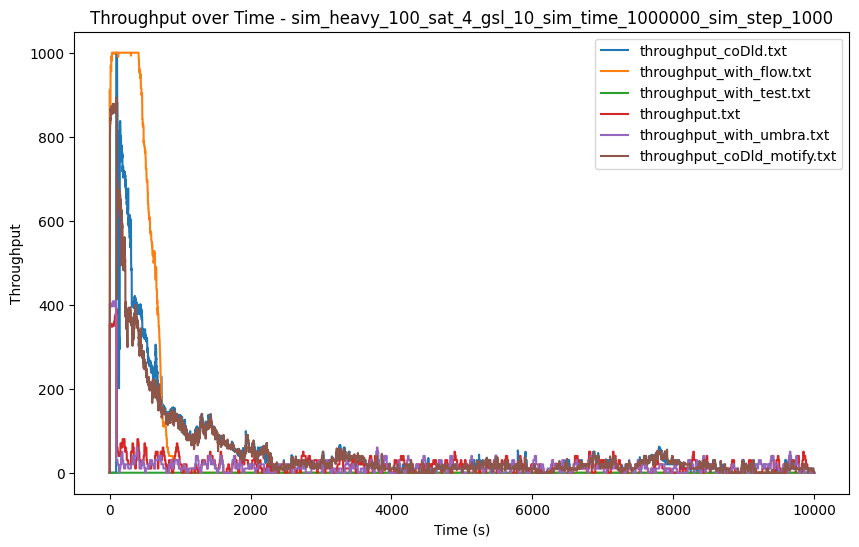

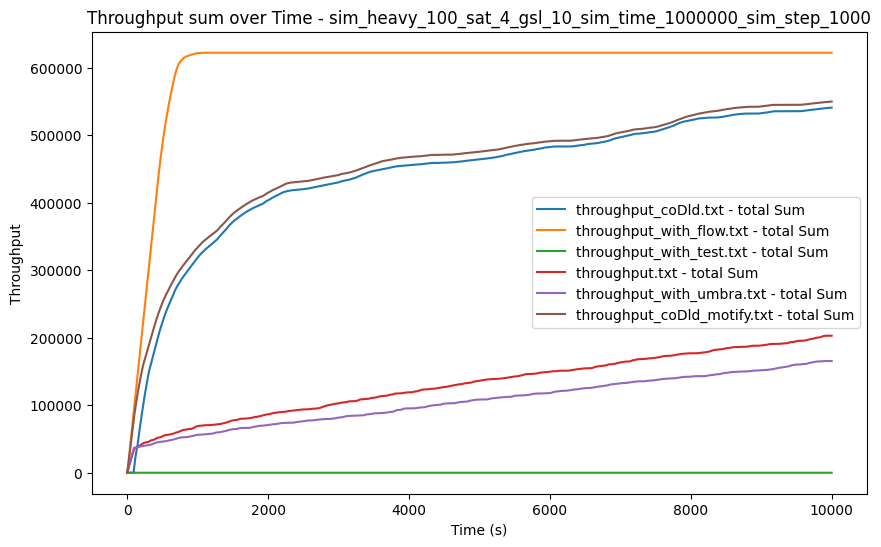

No data found for latency_with_test.txt. Skipping plot.


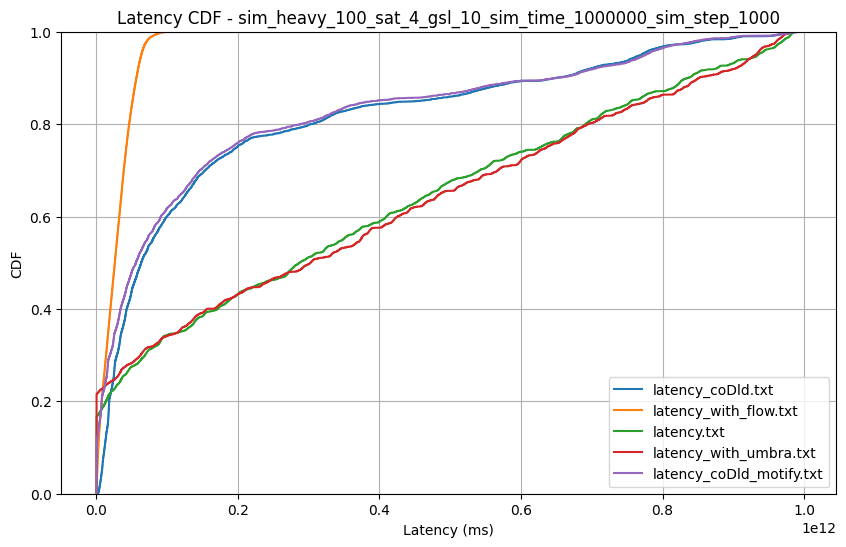

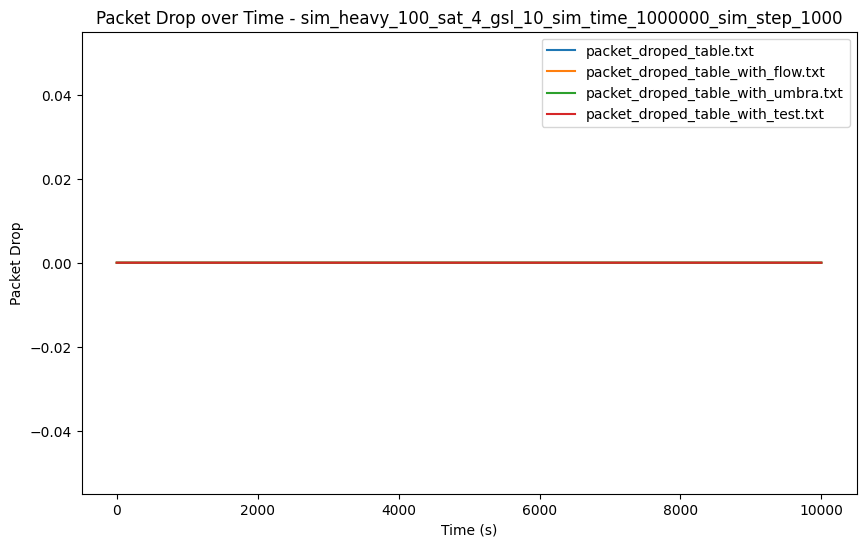

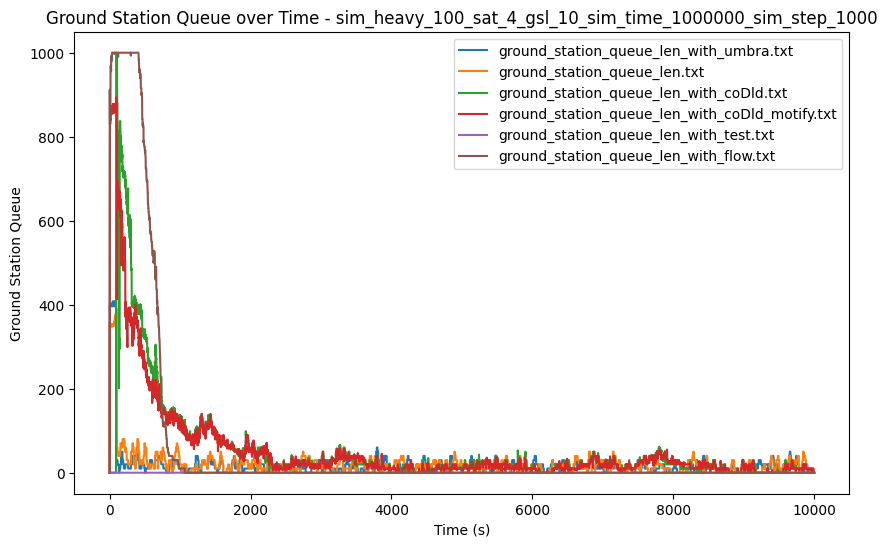

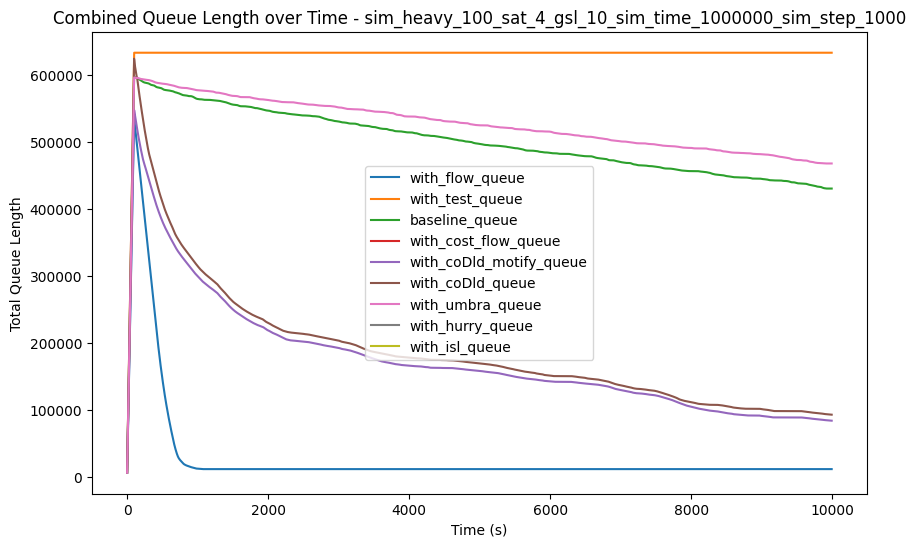

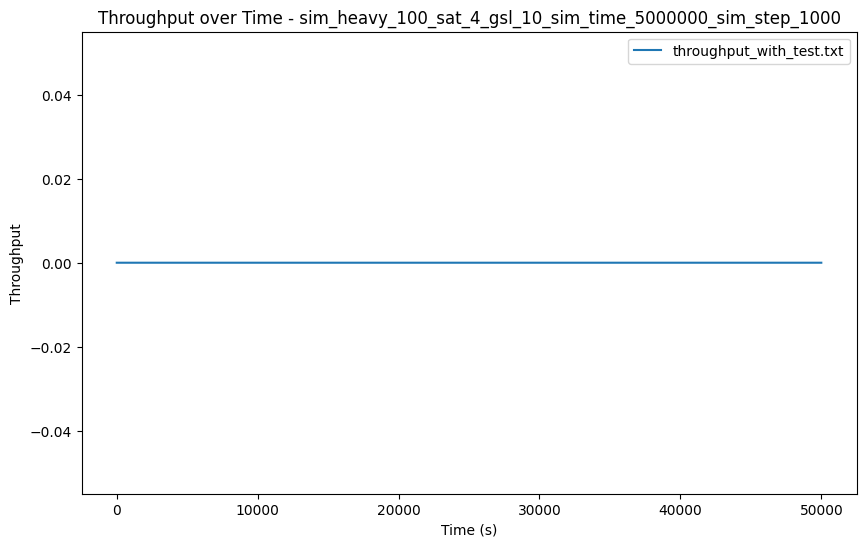

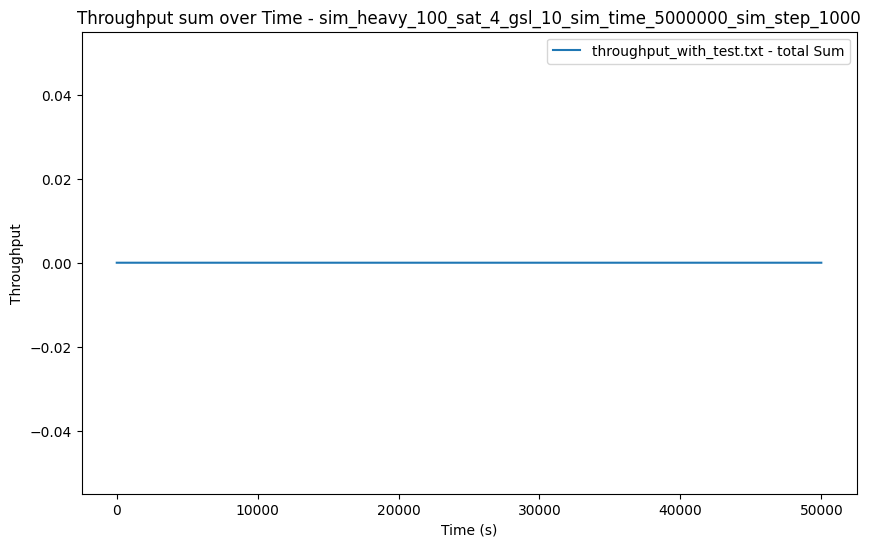

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data found for latency_with_test.txt. Skipping plot.


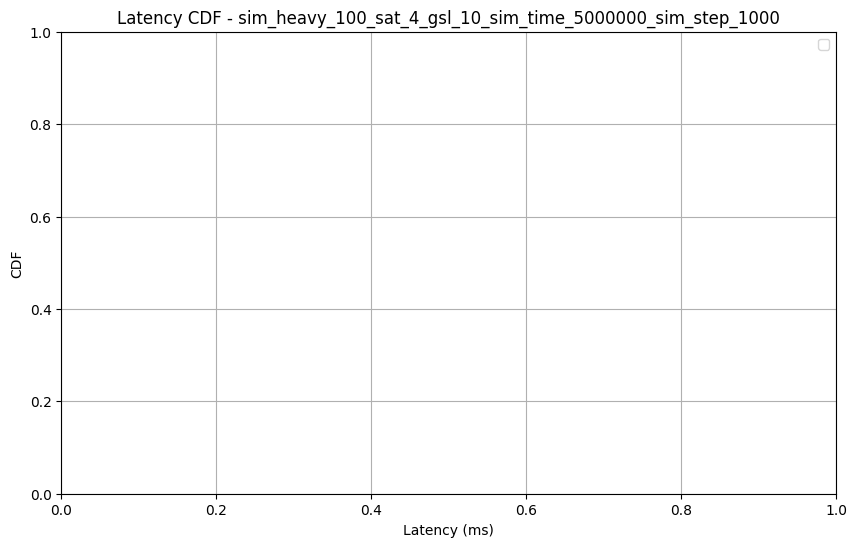

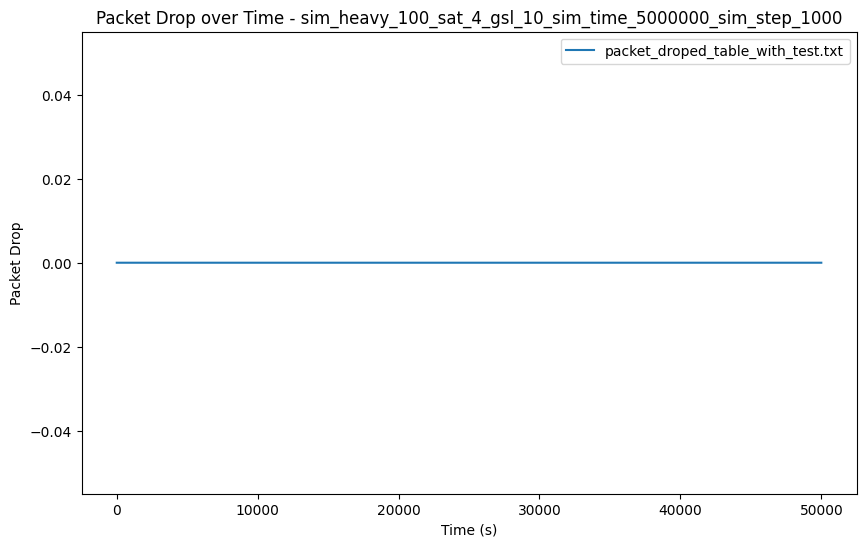

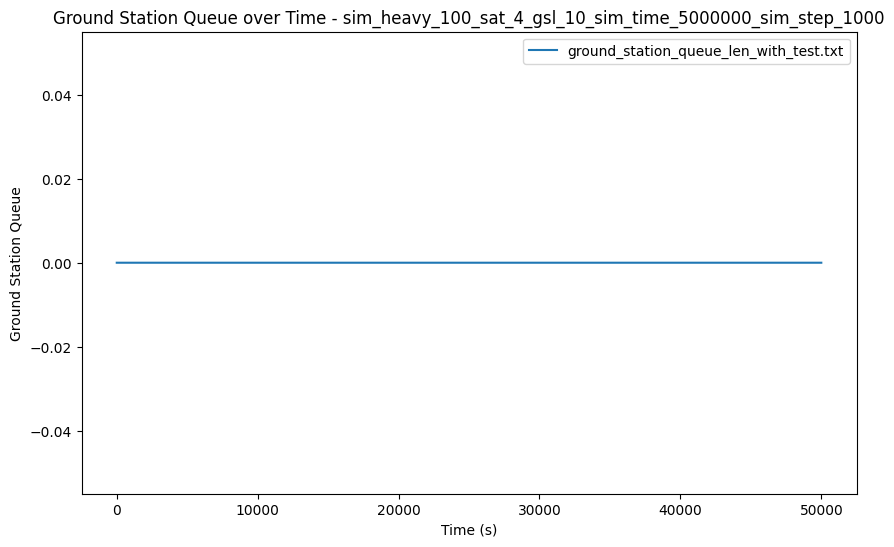

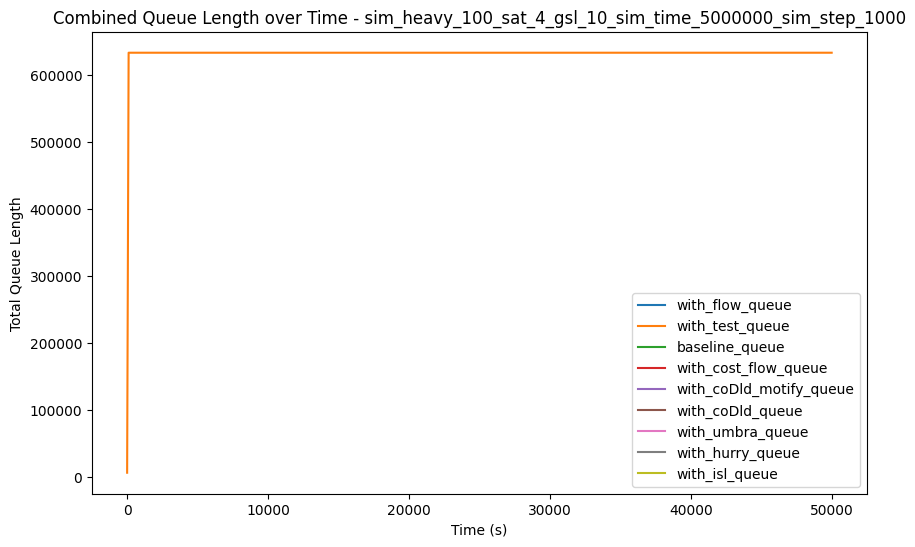

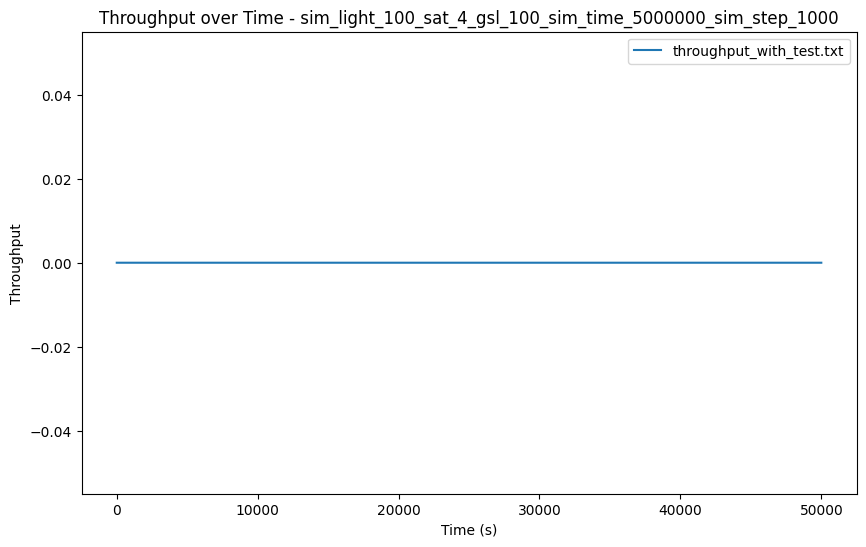

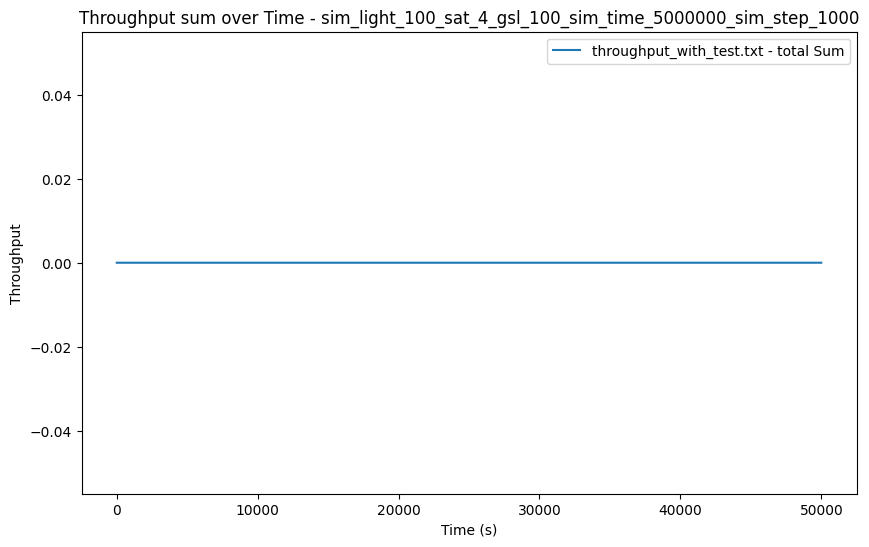

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data found for latency_with_test.txt. Skipping plot.


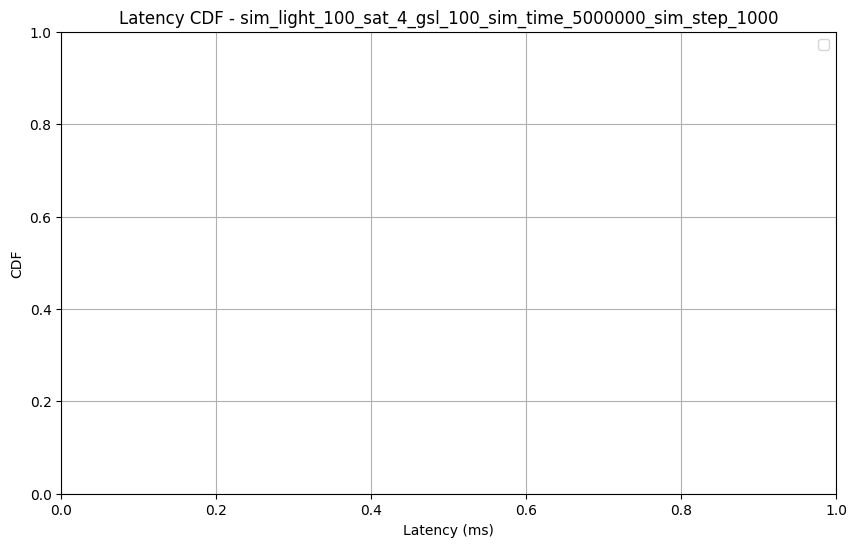

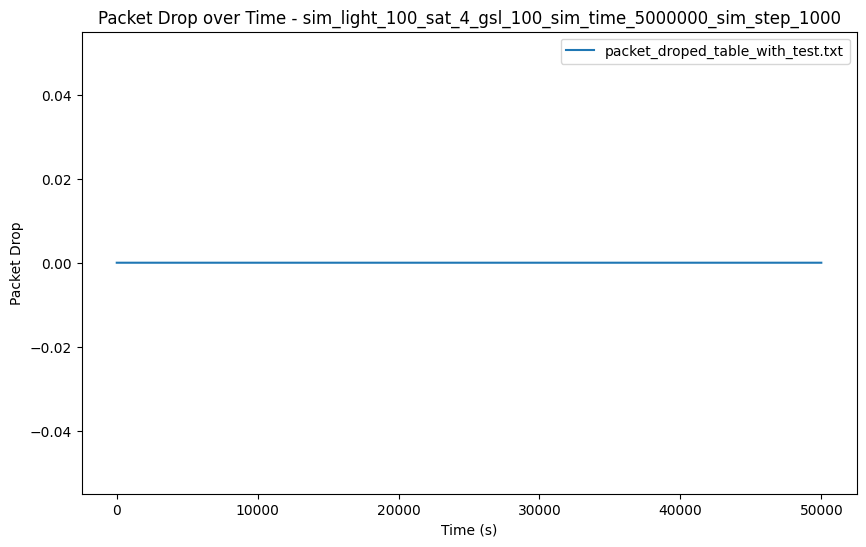

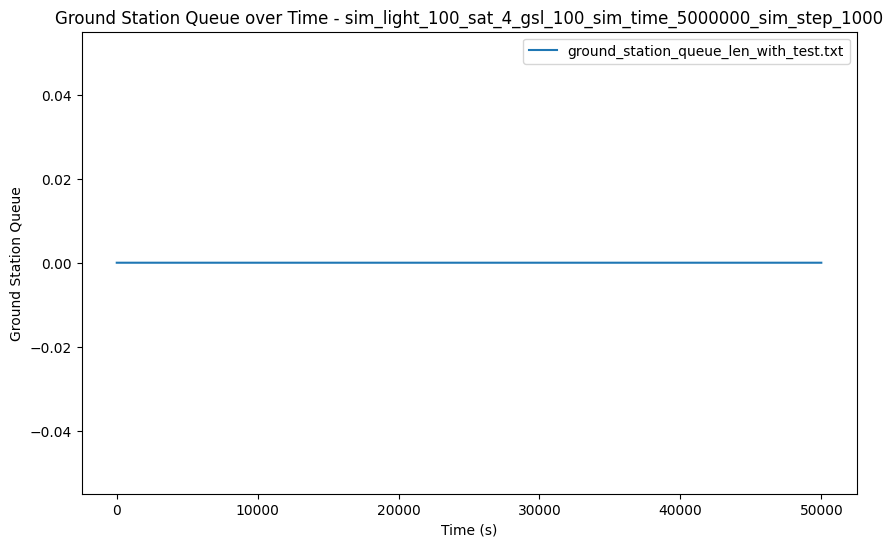

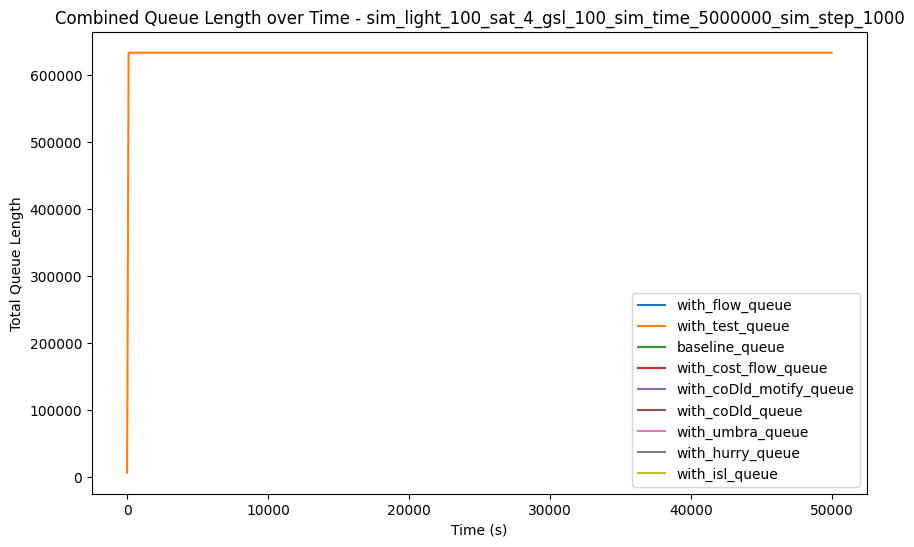

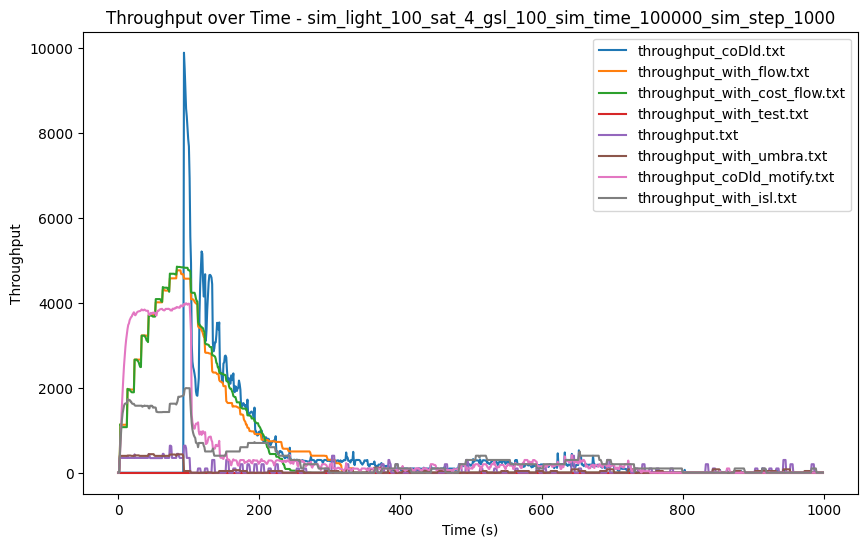

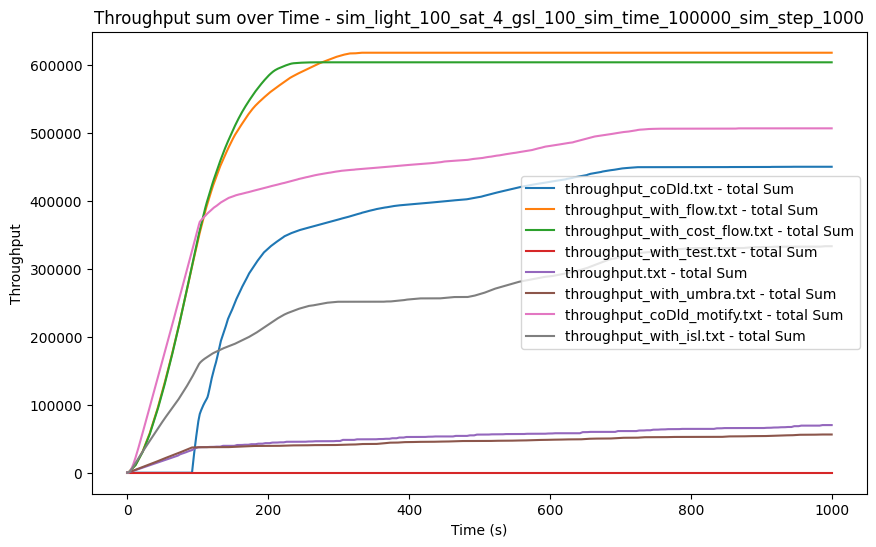

No data found for latency_with_test.txt. Skipping plot.


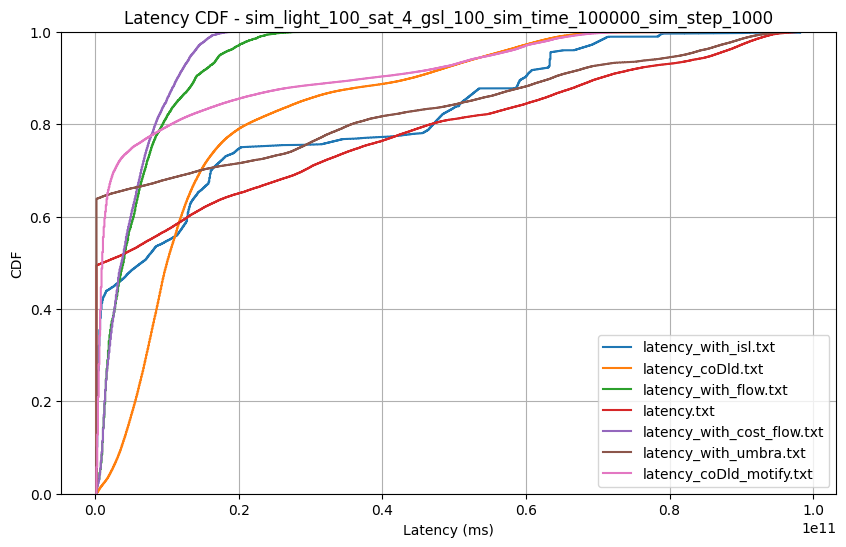

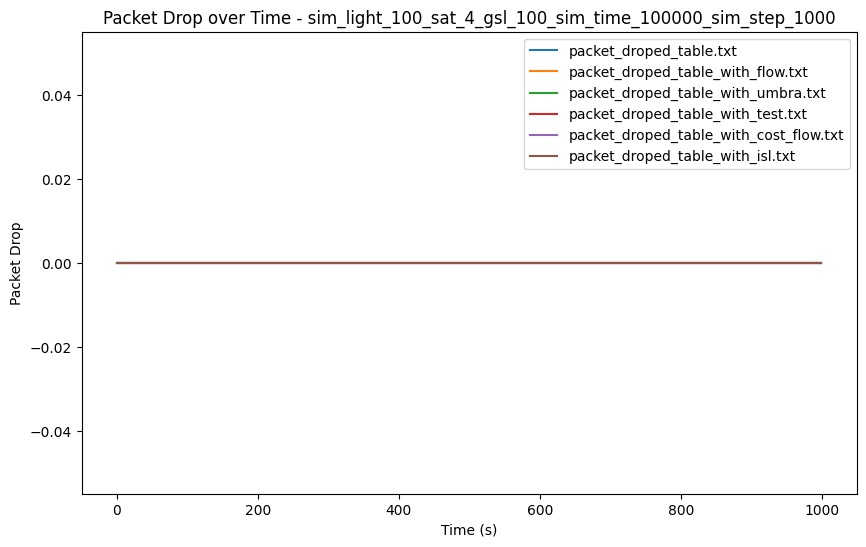

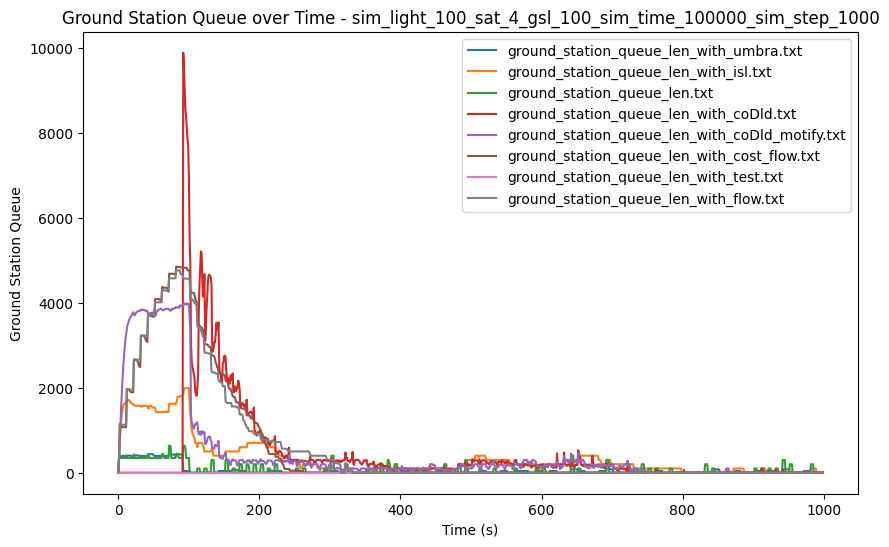

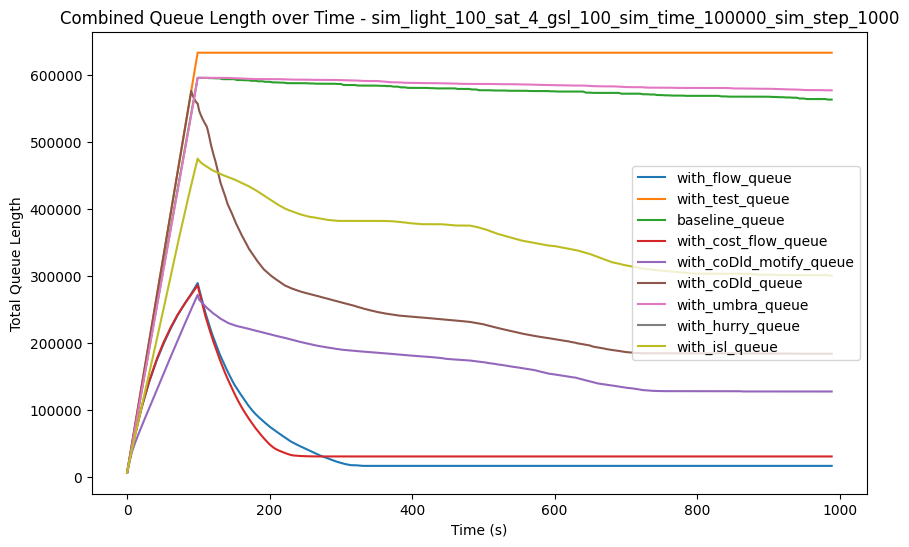

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def cumulative_sum(data):
    """Calculate the cumulative sum of a list."""
    return np.cumsum(data)
def read_latency_data(file_path):
    """Read latency data from a text file."""
    latencies = []
    counts = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):
            latency = float(lines[i].strip())
            count = int(lines[i+1].strip())
            latencies.extend([latency] * count)
    return latencies

def plot_cdf(data, experiment, label):
    """Plot a CDF graph, ensuring the right edge is complete."""
    if data:
        sorted_data = np.sort(data)
        yvals = np.arange(len(sorted_data) + 1) / float(len(sorted_data))
        sorted_data = np.append(sorted_data, sorted_data[-1])
        plt.step(sorted_data, yvals, label=label, where="post")
    else:
        print(f"No data found for {label}. Skipping plot.")
        return
def read_data(file_path):
    """Read data from a text file and return it as a list."""
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

def process_folder(folder_path, file_keyword):
    """Process all files in a folder that contain a specific keyword."""
    data = {}
    for file in os.listdir(folder_path):
        if file_keyword in file:
            file_path = os.path.join(folder_path, file)
            data[file] = read_data(file_path)
    return data

def sum_queue_lengths(folder_path):
    """Sum the queue lengths of all files in a queue folder."""
    total_queue_length = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        queue_length = read_data(file_path)
        if not total_queue_length:
            total_queue_length = queue_length
        else:
            total_queue_length = [sum(x) for x in zip(total_queue_length, queue_length)]
    return total_queue_length

def plot_data_single_experiment(data, experiment, data_type):
    """Plot data for a single experiment."""
    plt.figure(figsize=(10, 6))
    for key, values in data.items():
        plt.plot(values, label=key)
    plt.title(f'{data_type} over Time - {experiment}')
    plt.xlabel('Time (s)')
    plt.ylabel(data_type)
    plt.legend()
    plt.show()
    
def process_and_plot_cdf(folder_path, experiment, file_keyword):
    """Process all latency files in a folder and plot their CDFs."""
    plt.figure(figsize=(10, 6))
    for file in os.listdir(folder_path):
        if file_keyword in file:
            file_path = os.path.join(folder_path, file)
            latency_data = read_latency_data(file_path)
            plot_cdf(latency_data, experiment, file)
    plt.title(f'Latency CDF - {experiment}')
    plt.xlabel('Latency (ms)')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
def plot_data_single_total_experiment(data, experiment, data_type):
    """Plot data and its cumulative sum for a single experiment."""
    plt.figure(figsize=(10, 6))

    for key, values in data.items():
        # Plot original data
        # Plot cumulative sum
        cum_sum_values = cumulative_sum(values)
        plt.plot(cum_sum_values, label=f'{key} - total Sum')

    plt.title(f'{data_type} sum over Time - {experiment}')
    plt.xlabel('Time (s)')
    plt.ylabel(data_type)
    plt.legend()
    plt.show()

def plot_combined_queue_length(experiment_path, experiment_name):
    """Plot the combined queue length of all algorithms in a single experiment."""
    combined_data = {}

    for folder in os.listdir(experiment_path):
        if 'queue' in folder and os.path.isdir(os.path.join(experiment_path, folder)):
            queue_folder_path = os.path.join(experiment_path, folder)
            queue_len_data = sum_queue_lengths(queue_folder_path)
            combined_data[folder] = queue_len_data

    # Plot the combined queue length data
    plt.figure(figsize=(10, 6))
    for key, values in combined_data.items():
        plt.plot(values, label=key)
    plt.title(f'Combined Queue Length over Time - {experiment_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Queue Length')
    plt.legend()
    plt.show()



# Path to the gen_data directory
gen_data_path = 'gen_data'  # 修改为实际路径

# Processing and plotting data for each experiment separately
for experiment in os.listdir(gen_data_path):
    folder_path = os.path.join(gen_data_path, experiment)
    
    # Process and plot throughput data
    throughput_data = process_folder(folder_path, 'throughput')
    if throughput_data:
        plot_data_single_experiment(throughput_data, experiment, 'Throughput')
        plot_data_single_total_experiment(throughput_data, experiment, 'Throughput')
    
    # Process and plot latency CDF data
    process_and_plot_cdf(folder_path, experiment, 'latency')

    # Process and plot packet dropped data
    packet_drop_data = process_folder(folder_path, 'packet_droped_table')
    if packet_drop_data:
        plot_data_single_experiment(packet_drop_data, experiment, 'Packet Drop')
    
    # Process and plot ground station queue data
    ground_station_data = process_folder(folder_path, 'ground_station')
    if ground_station_data:
        plot_data_single_experiment(ground_station_data, experiment, 'Ground Station Queue')

    # Process and plot combined queue length data
    plot_combined_queue_length(folder_path, experiment)